### **IMPORTS**

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import cleaning as cl
import transforming as tr

# **DATA UNDERSTANDING**

### **CV'S PATHS**

In [2]:
paths = {
    "pacientes": '../../data/raw_2/pacientes_data.csv',
    "caqueta": '../../data/raw/caqueta_data.csv',
    "narino": '../../data/raw/Narino_data.csv',
    "putumayo": '../../data/raw/Putumayo_data.csv',
    "caqueta_2": '../../data/raw_2/caqueta_data_2.csv',
    "narino_2": '../../data/raw_2/Narino_data_2.csv',
    "putumayo_2": '../../data/raw_2/Putumayo_data_2.csv',
}

### **READ AND NAME CV'S**

In [3]:
pacientes_df = pd.read_csv(paths["pacientes"], low_memory=False)
caqueta_df = pd.read_csv(paths["caqueta"], low_memory=False)
narino_df = pd.read_csv(paths["narino"], low_memory=False)
putumayo_df = pd.read_csv(paths["putumayo"], low_memory=False)
caqueta_df_2 = pd.read_csv(paths["caqueta_2"], low_memory=False)
narino_df_2 = pd.read_csv(paths["narino_2"], low_memory=False)
putumayo_df_2 = pd.read_csv(paths["putumayo_2"], low_memory=False)

caqueta_df.name = 'caqueta'
pacientes_df.name = 'pacientes'
narino_df.name = 'narino'
putumayo_df.name = 'putumayo'
caqueta_df_2.name = 'caqueta_2'
narino_df_2.name = 'narino_2'
putumayo_df_2.name = 'putumayo_2'

# **BEFORE CLEANING**

### **COLUMNS**

In [4]:
print("caqueta: ", list(caqueta_df_2))
print("narino: ", list(narino_df_2))
print("putumayo: ", list(putumayo_df_2))

caqueta:  ['Año', 'Mes', 'Grupo de Riesgo', 'Programa', 'Evento', 'Afiliados', 'OrigenBD', 'CodDepto', 'DesDepto', 'CodMpio', 'DescMpio', 'Latitud_Y_Mpio', 'Longitud_X_Mpio', 'tipo_usuario', 'Estado', 'FechaNovedadFallecido', 'tipo_identifiCAcion', 'Documento', 'ConCAtenar', 'nombre1', 'nombre2', 'apellido1', 'apellido2', 'FechaNac', 'Edad', 'CiclosV', 'DescrCiclosV', 'QuinQ', 'DescQuinQ', 'Género', 'Cod_Género', 'EnfoqueDif', 'Hecho Victimizante', 'RUV', 'Nivel_Educativo', 'Ocupación', 'Tipo de afiliado', 'Estado_Civil', 'Discapacidad', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Grado de Discapacidad', 'Pertenencia Étnica', 'MUNICIPIO DONDE VIVE', 'DIRECCIÓN DE DONDE VIVE', 'TELEFONOS DE CONTACTO', 'Zona', 'Cód_poblado', 'Nombre_poblado', 'Latitud_Afiliado', 'Longitud_Afiliado', 'Validación_Dirección_Afiliado', 'CodDepto_IPS', 'DesDepto_IPS', 'CodMpio_IPS', 'DescMpio_IPS', 'CodIPS', 'Nombre_IPS', 'Dirección_IPS', 'Barrio_IPS', 'Teléfono_IPS', 'Latitud_IPS', 'Longitud_IPS', 

In [5]:
def comparable_info(df1, df2):
    fig, axes = plt.subplots(2, 1, figsize=(16, 6))
    fig.suptitle("Missigness comparison")
    print("*************** {} ***************".format(df1.name))
    print(df1.info())
    print(df1.describe())

    msno.matrix(df1, ax=axes[0], sparkline=False)
    axes[0].set_title(("Missing Values Matrix for {}".format(df1.name)))

    print("*************** {} ***************".format(df2.name))
    print(df2.info())
    print(df2.describe())

    msno.matrix(df2, ax=axes[1], sparkline=False)
    axes[1].set_title(("Missing Values Matrix for {}".format(df2.name)))

    plt.show()


### **INFO CAQUETÁ**

*************** caqueta ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Columns: 150 entries, Año to Complicación Renales
dtypes: float64(95), int64(12), object(43)
memory usage: 2.1+ MB
None
          Año      Mes    Afiliados  CodDepto       CodMpio  \
count  1861.0   1861.0  1861.000000    1861.0   1861.000000   
mean   2022.0  44830.0   931.000000      18.0  18229.533584   
std       0.0      0.0   537.368744       0.0    282.059842   
min    2022.0  44830.0     1.000000      18.0  18001.000000   
25%    2022.0  44830.0   466.000000      18.0  18001.000000   
50%    2022.0  44830.0   931.000000      18.0  18094.000000   
75%    2022.0  44830.0  1396.000000      18.0  18460.000000   
max    2022.0  44830.0  1861.000000      18.0  18860.000000   

       FechaNovedadFallecido     Documento         Edad      CiclosV  \
count                    0.0  1.861000e+03  1861.000000  1861.000000   
mean                     NaN  4.571422e+07    63.07576

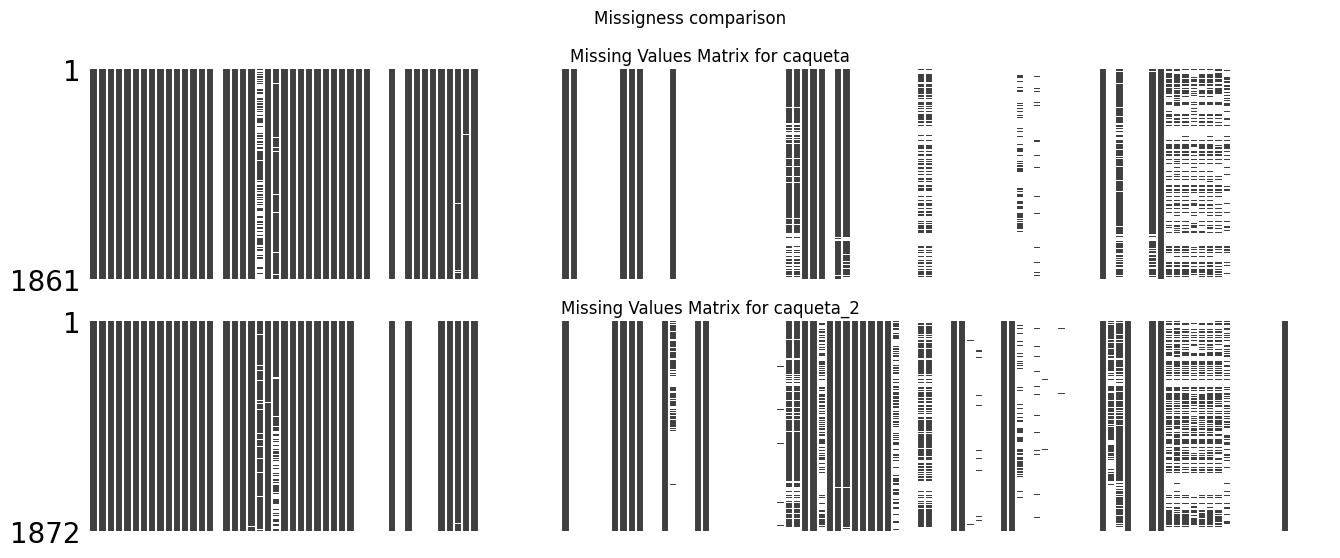

In [6]:
comparable_info(caqueta_df,caqueta_df_2)


### **INFO NARIÑO**

*************** narino ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Columns: 161 entries, Año to REPETIDO
dtypes: float64(44), int64(18), object(99)
memory usage: 5.5+ MB
None
          Año      Mes    Afiliados  CodDepto       CodMpio  tipo_usuario  \
count  4441.0   4441.0  4441.000000    4441.0   4441.000000           0.0   
mean   2022.0  44895.0  2221.000000      52.0  52413.624634           NaN   
std       0.0      0.0  1282.150602       0.0    347.143732           NaN   
min    2022.0  44895.0     1.000000      52.0  52001.000000           NaN   
25%    2022.0  44895.0  1111.000000      52.0  52001.000000           NaN   
50%    2022.0  44895.0  2221.000000      52.0  52356.000000           NaN   
75%    2022.0  44895.0  3331.000000      52.0  52835.000000           NaN   
max    2022.0  44895.0  4441.000000      52.0  52838.000000           NaN   

          Documento      FechaNac         Edad      CiclosV  ...  \
count  4.441000e+

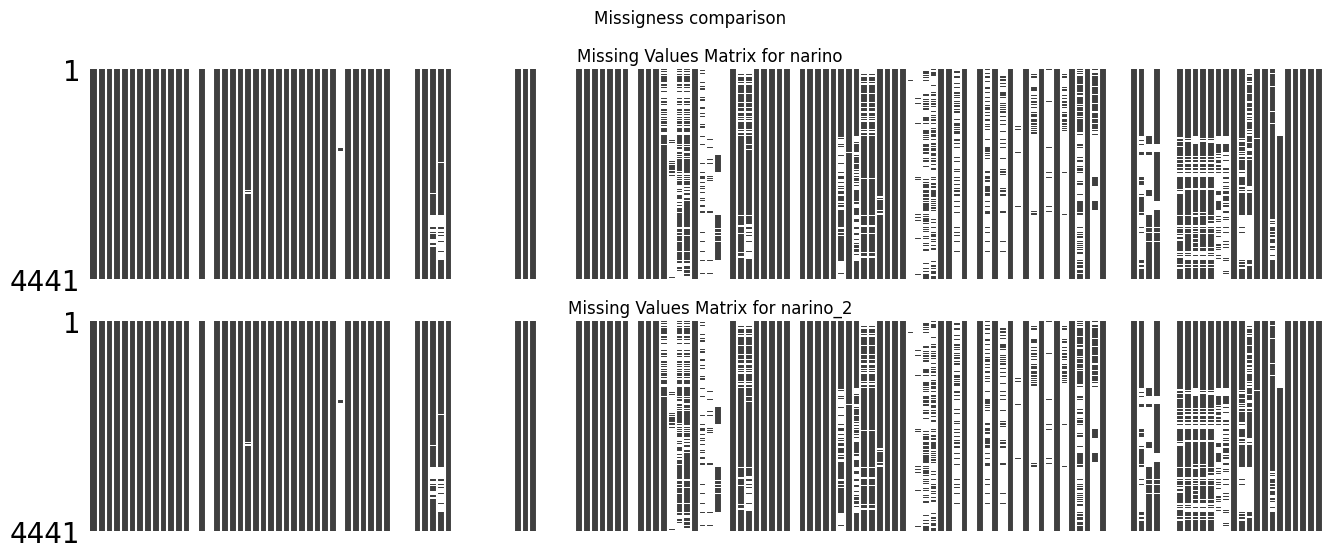

In [7]:
comparable_info(narino_df,narino_df_2)


### **INFO PUTUMAYO**

*************** putumayo ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Columns: 177 entries, Año to OBSERVACIONES
dtypes: float64(39), int64(16), object(122)
memory usage: 1.2+ MB
None
          Año      Mes   Afiliados  CodDepto       CodMpio  \
count   856.0    856.0  856.000000     856.0    856.000000   
mean   2022.0  44926.0  428.500000      86.0  86377.147196   
std       0.0      0.0  247.250211       0.0    345.618695   
min    2022.0  44926.0    1.000000      86.0  86001.000000   
25%    2022.0  44926.0  214.750000      86.0  86001.000000   
50%    2022.0  44926.0  428.500000      86.0  86568.000000   
75%    2022.0  44926.0  642.250000      86.0  86749.000000   
max    2022.0  44926.0  856.000000      86.0  86885.000000   

       FechaNovedadFallecido     Documento        Edad     CiclosV  \
count              42.000000  8.560000e+02  856.000000  855.000000   
mean            44465.238095  4.047116e+07   59.608645    5.487719   
std 

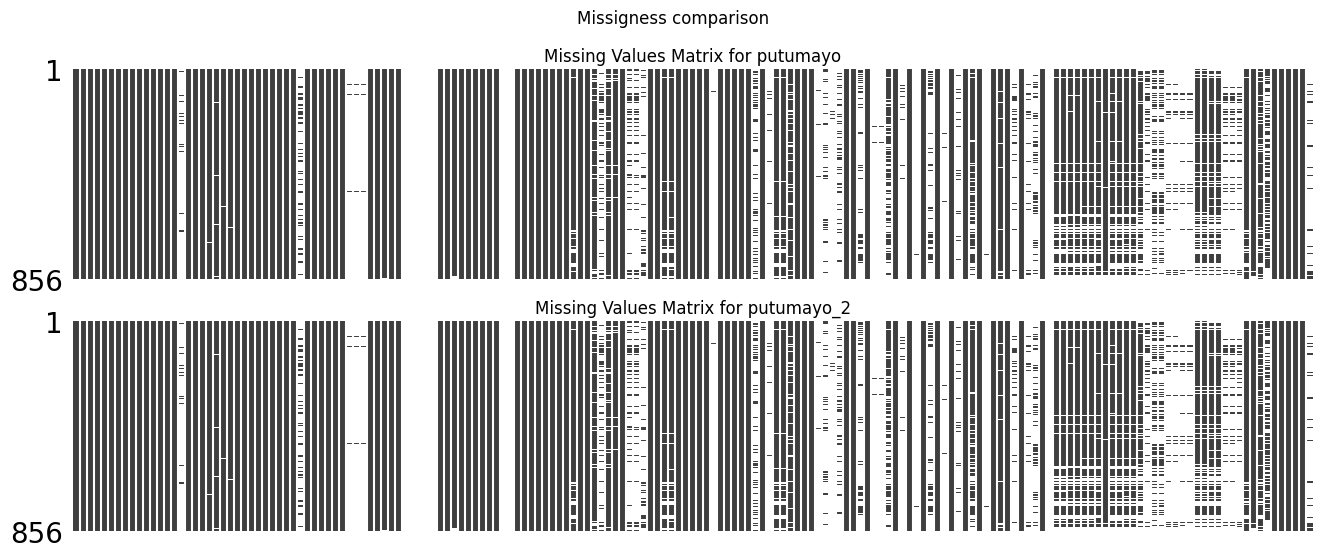

In [8]:
comparable_info(putumayo_df,putumayo_df_2)

### **INFO PACIENTS**

*************** pacientes ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65819 entries, 0 to 65818
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Afiliado               65819 non-null  object 
 1   Región                    65819 non-null  object 
 2   UT                        65819 non-null  object 
 3   Primer Nombre             65819 non-null  object 
 4   Segundo Nombre            53684 non-null  object 
 5   Primer Apellido           65819 non-null  object 
 6   Segundo Apellido          63451 non-null  object 
 7   Tipo de Documento         65819 non-null  object 
 8   Número de Documento       65819 non-null  int64  
 9   Celular                   26129 non-null  object 
 10  Correo                    8197 non-null   object 
 11  Sexo                      65819 non-null  object 
 12  Fecha de Afiliación       65819 non-null  object 
 13  Fecha Nacimiento   

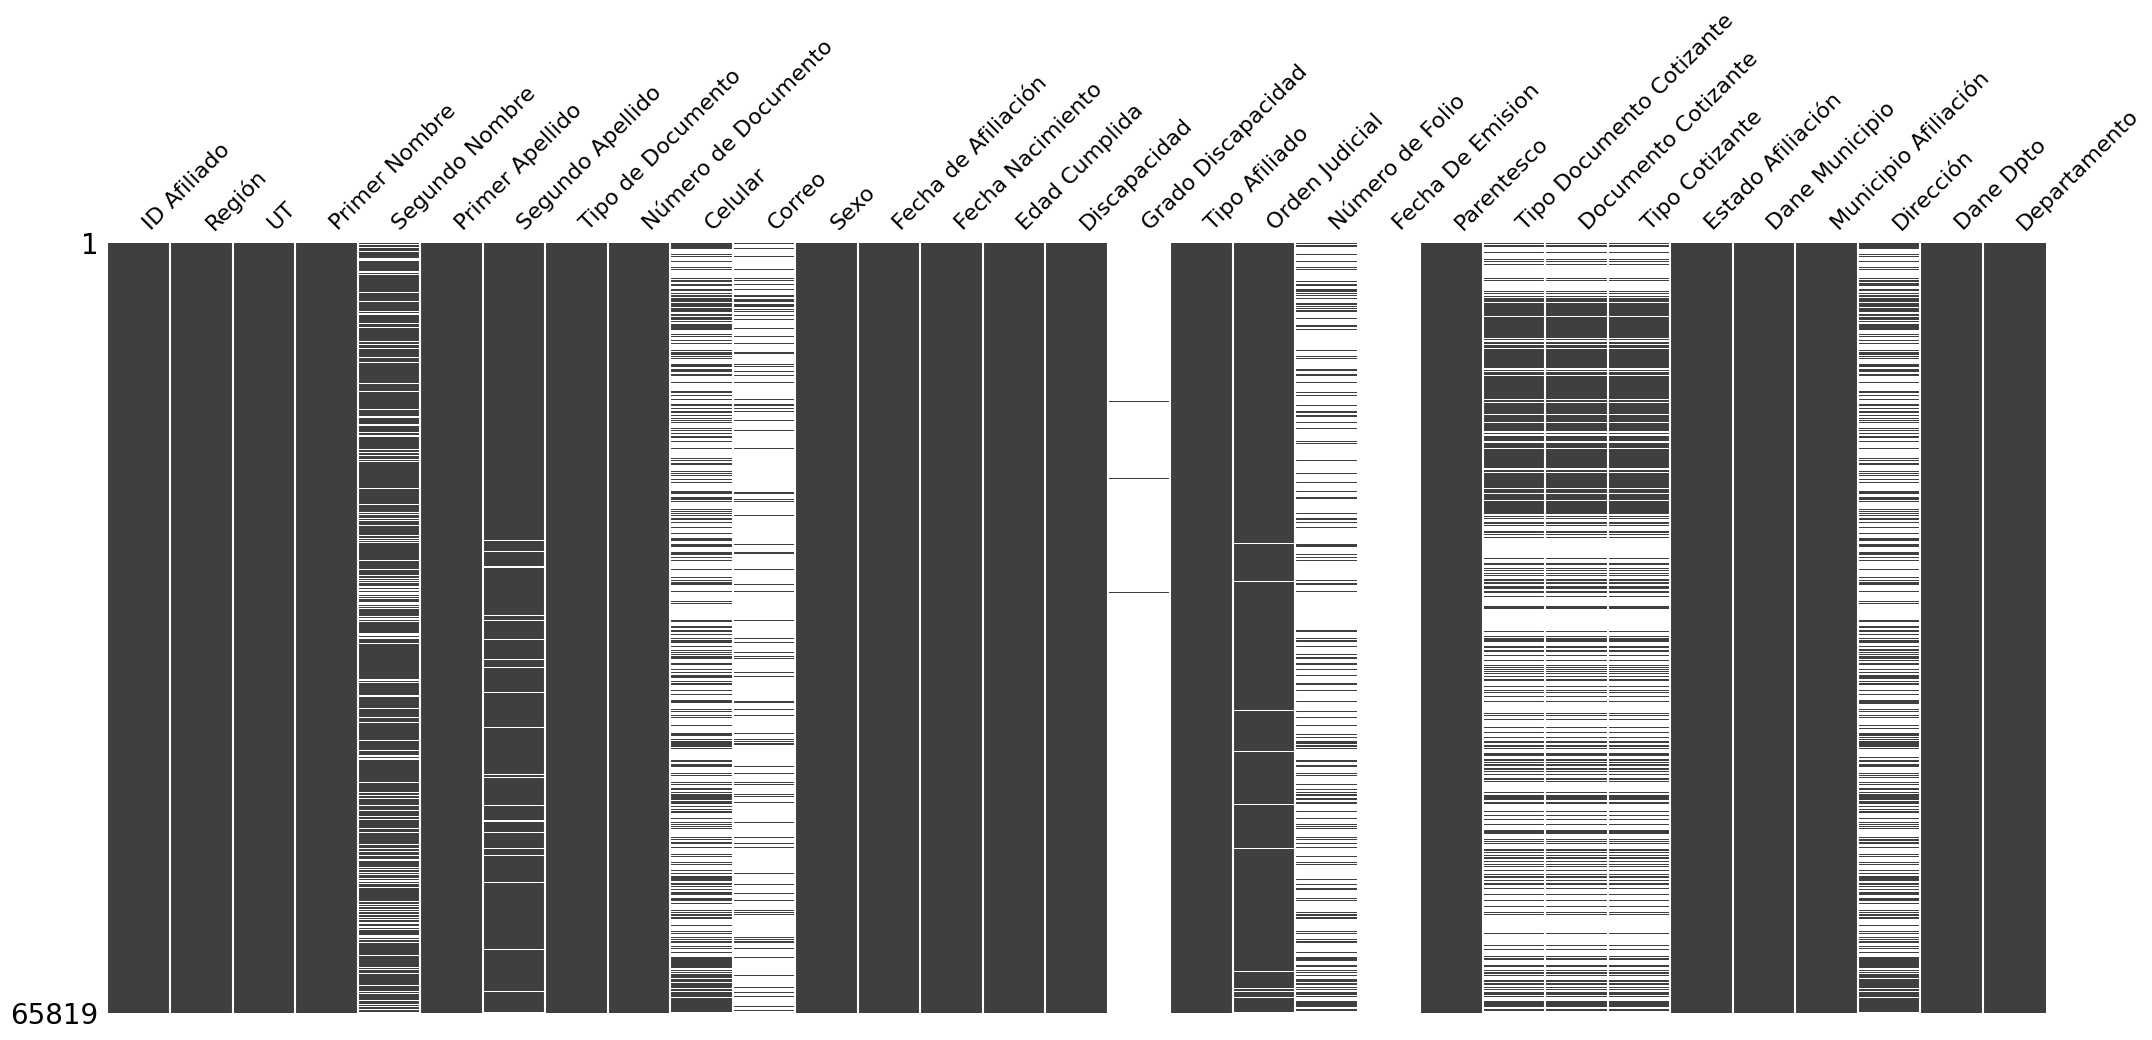

In [9]:
msno.matrix(pacientes_df, sparkline=False)
print("*************** {} ***************".format(pacientes_df.name))
print(pacientes_df.info())
print(pacientes_df.describe())

# **Data Preparation**

### **DATA PREPARATION SETUP**

In [10]:
saving_paths = {
    "transformed_data": '../../data/processed/transformed_data/transformed_data.csv',
    "clean_data": '../../data/processed/cleaned_data/Cleaned_data.csv'
}

cl = cl.Cleaning(saving_paths["clean_data"])
tr = tr.Transform(saving_paths["clean_data"], saving_paths["transformed_data"])

In [11]:
cl.run()
unified_df = cl.get_unified_df()
unified_df.name = 'unified df'
df_clean = cl.get_df_clean()
df_clean.name = 'clean df'

tr.run()
transformed_df = tr.get_df_transformed()
transformed_df.name = 'transformed df' 

------------------------------------------------
Cleaning...
Data successfully cleaned!
Clean data successfully saved in: ../../data/processed/cleaned_data/Cleaned_data.csv
------------------------------------------------
------------------------------------------------
Transforming...
All transformations successfully applied!
Transformed data succesfully saved in: ../../data/processed/transformed_data/transformed_data.csv
------------------------------------------------


### **UNIFIED DATA DRAME**

*************** unified df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7169 entries, 0 to 1871
Data columns (total 60 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Grupo de Riesgo                                                     7169 non-null   object 
 1   CodDepto                                                            7169 non-null   int64  
 2   FechaNovedadFallecido                                               7169 non-null   object 
 3   Edad                                                                2727 non-null   object 
 4   Género                                                              7169 non-null   object 
 5   Cod_Género                                                          7169 non-null   int64  
 6   Tipo de Discapacidad                                                7

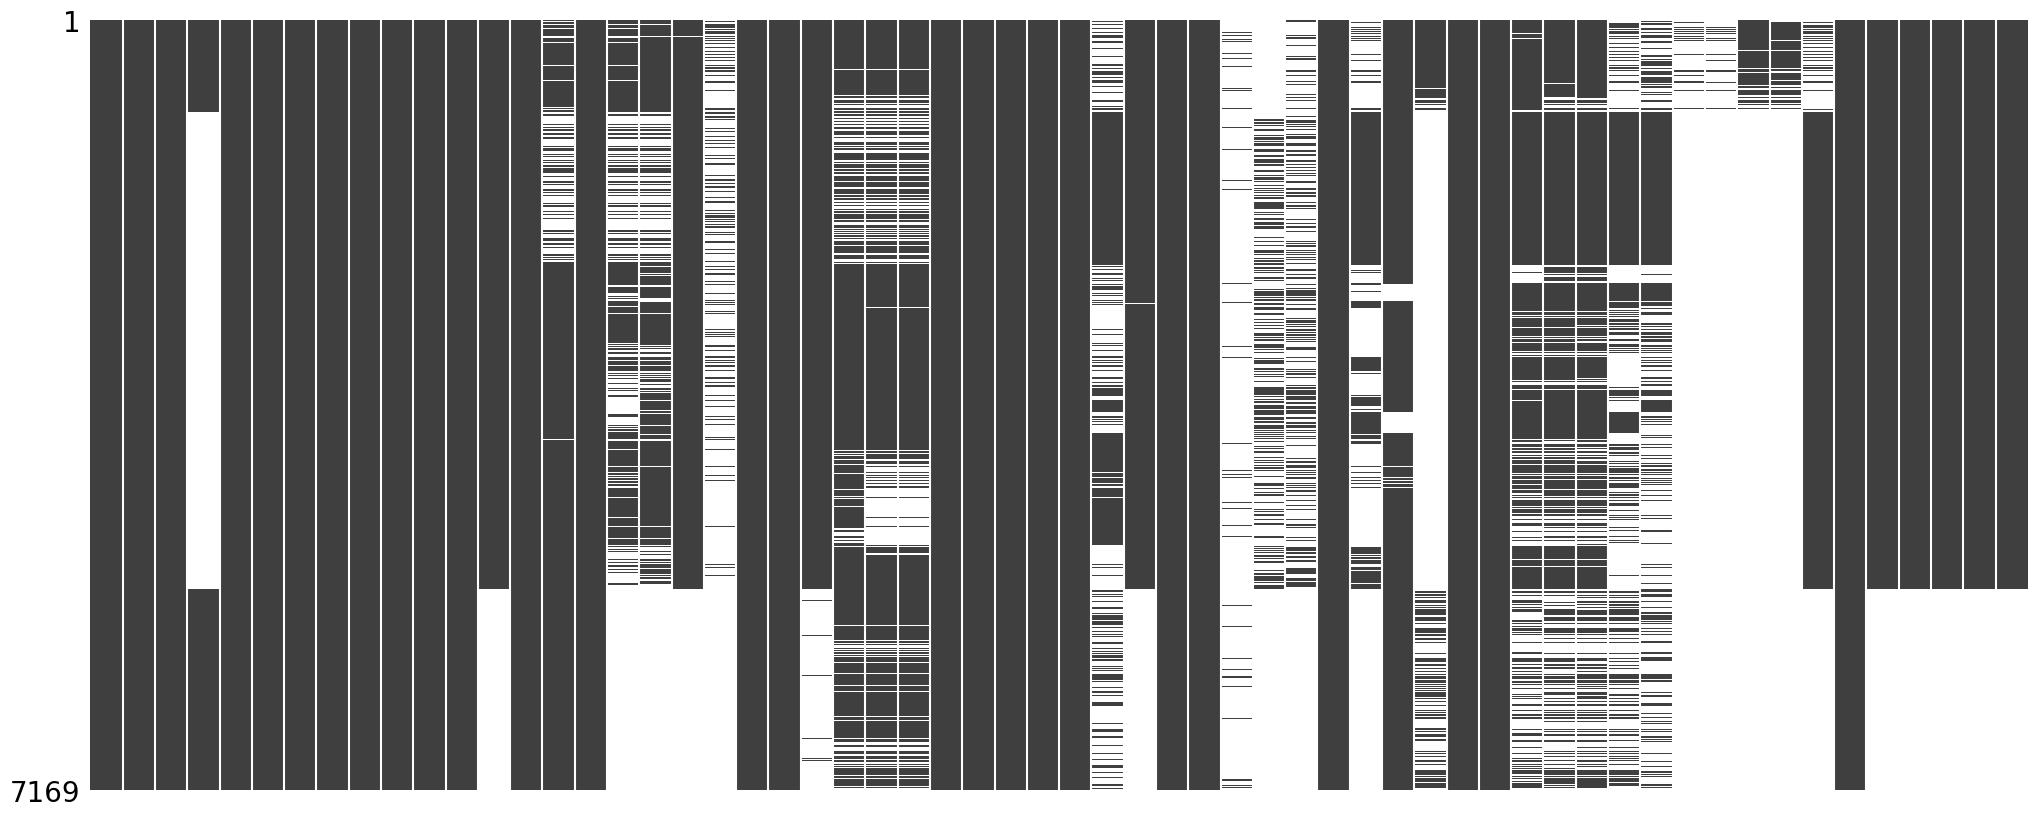

In [12]:
msno.matrix(unified_df, sparkline=False)
print("*************** {} ***************".format(unified_df.name))
print(unified_df.info())
print(unified_df.describe())

### **CLEAN DATA DRAME**

*************** clean df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Grupo de Riesgo                                     7169 non-null   object 
 1   CodDepto                                            7169 non-null   int64  
 2   FechaNovedadFallecido                               7169 non-null   object 
 3   Género                                              7169 non-null   object 
 4   Cod_Género                                          7169 non-null   int64  
 5   Tipo de Discapacidad                                7169 non-null   object 
 6   Condición de Discapacidad                           7169 non-null   object 
 7   Pertenencia Étnica                                  7169 non-null   object 
 8   Coomorbilidad                        

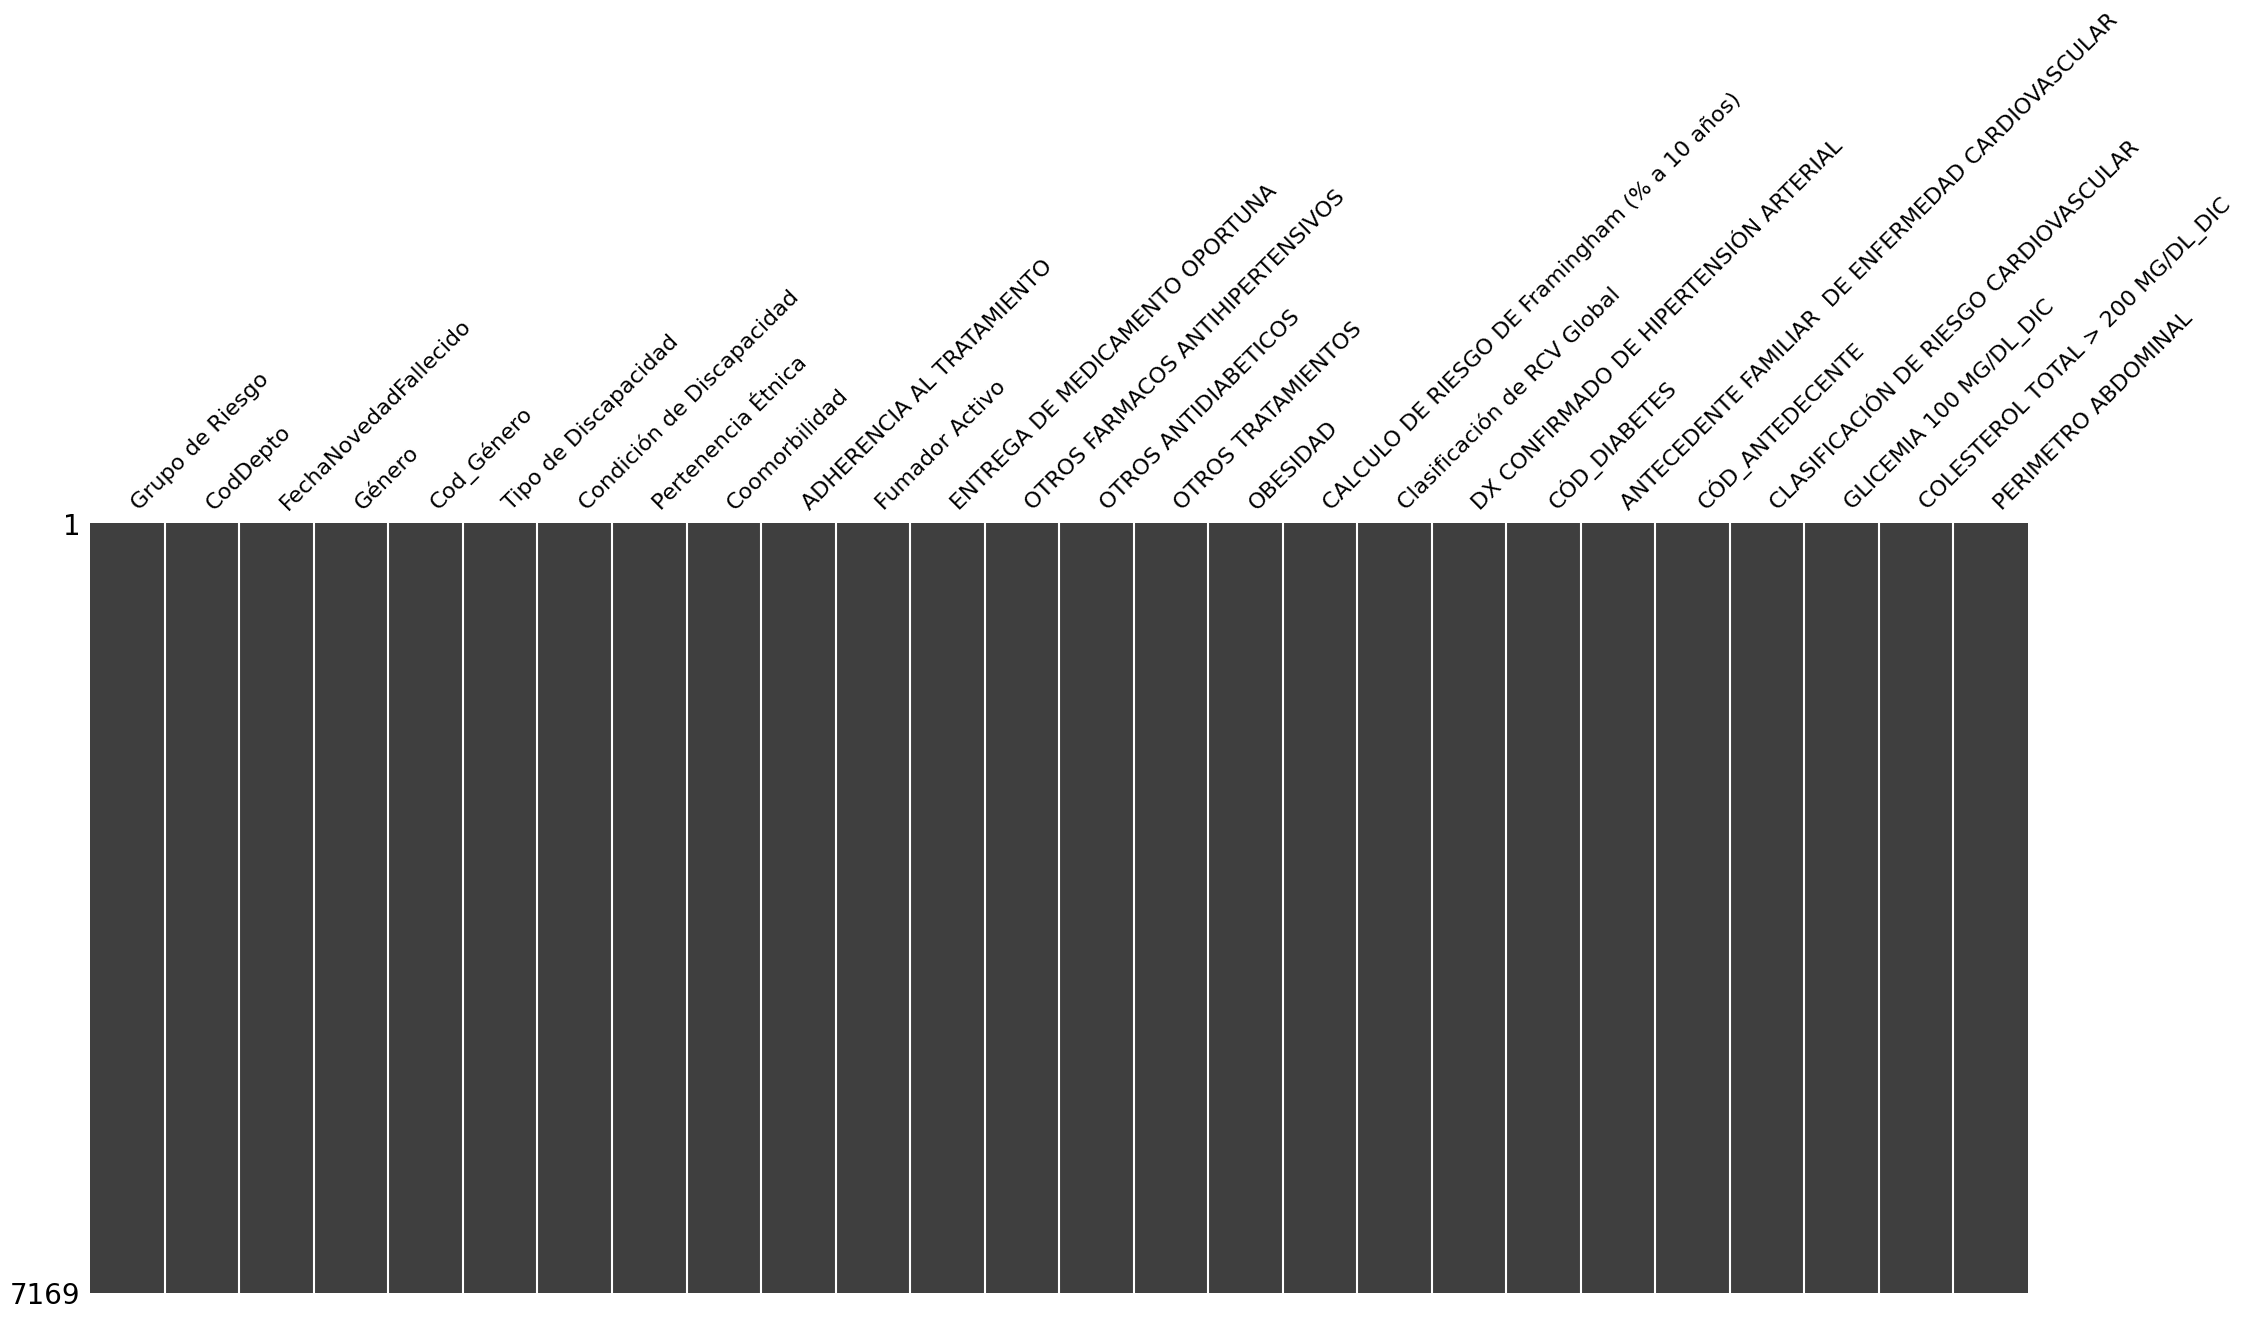

In [13]:
msno.matrix(df_clean, sparkline=False)
print("*************** {} ***************".format(df_clean.name))
print(df_clean.info())
print(df_clean.describe())

## **TRANSFORMED DATA FRAME**

*************** transformed df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Columns: 483 entries, Grupo de Riesgo to OBESIDAD_SOBREPESO
dtypes: float64(4), int64(5), object(8), uint8(466)
memory usage: 4.1+ MB
None
        Cod_Género  Fumador Activo  \
count  7169.000000     7169.000000   
mean      1.613754        0.008788   
std       0.486922        0.093337   
min       1.000000        0.000000   
25%       1.000000        0.000000   
50%       2.000000        0.000000   
75%       2.000000        0.000000   
max       2.000000        1.000000   

       CALCULO DE RIESGO DE Framingham (% a 10 años)  \
count                                    7169.000000   
mean                                       14.811186   
std                                        13.036423   
min                                         0.000000   
25%                                         2.000000   
50%                                        14.000000   
75%  

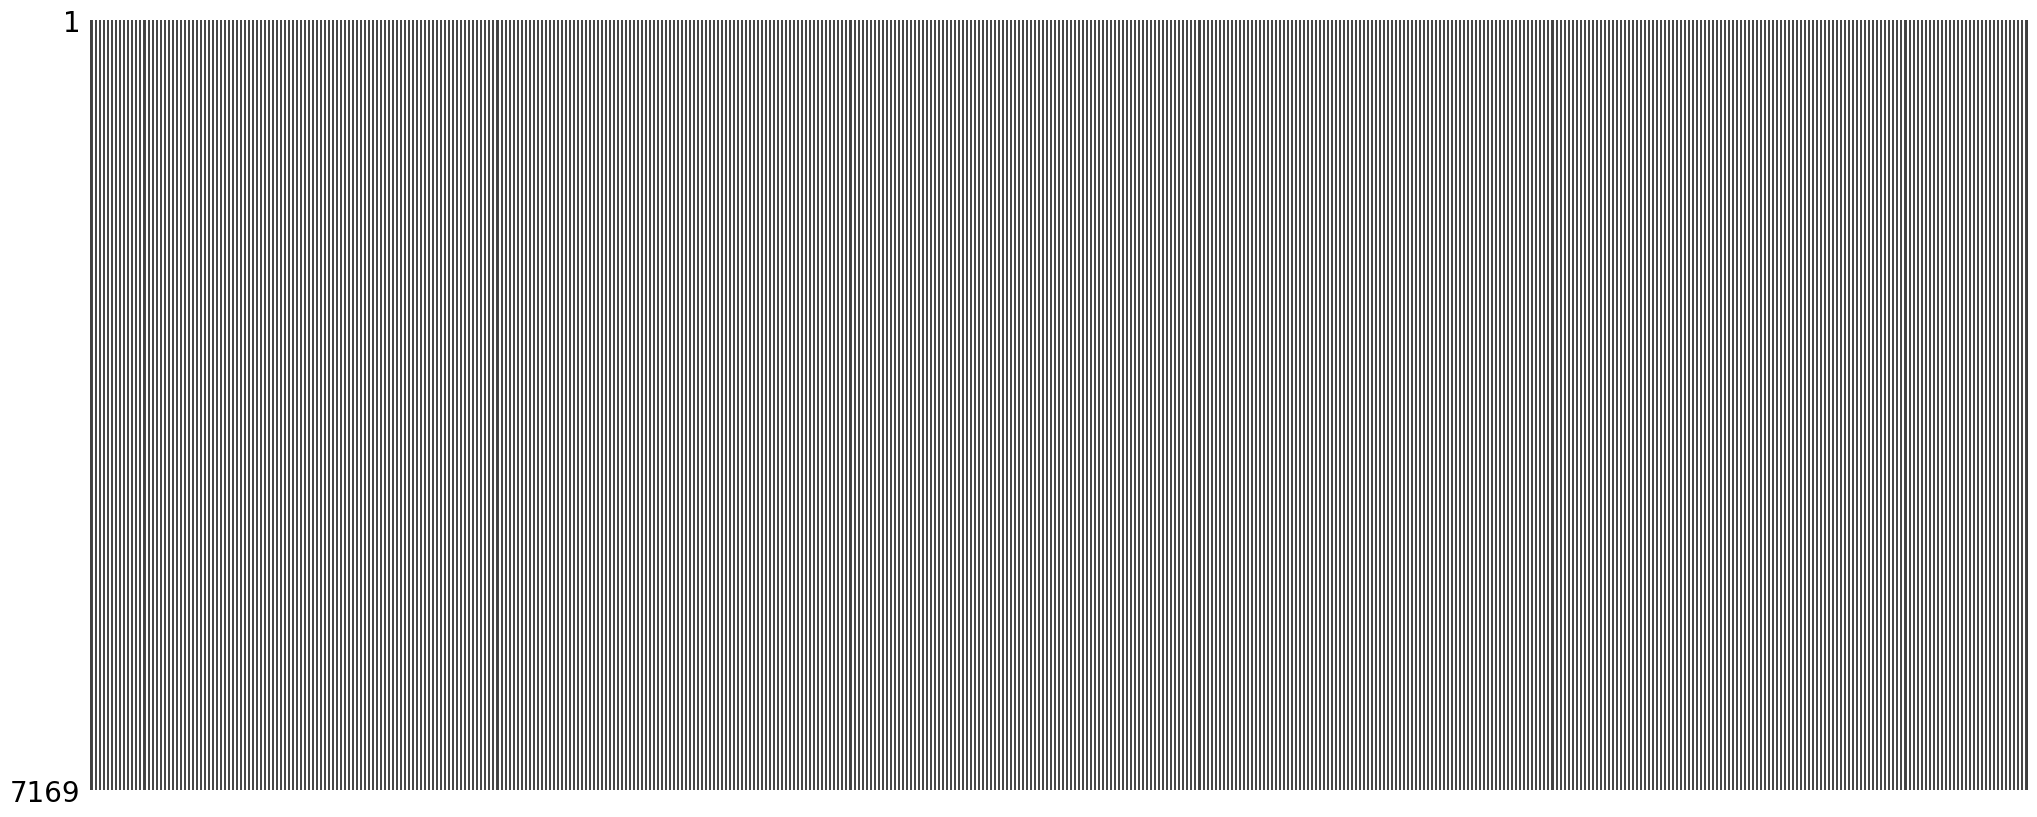

In [14]:
msno.matrix(transformed_df, sparkline=False)
print("*************** {} ***************".format(transformed_df.name))
print(transformed_df.info())
print(transformed_df.describe())